In [2]:
from sklearn.neighbors import KDTree
from sklearn.datasets import make_blobs, make_moons, make_swiss_roll
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib
import copy
# import opencv
from collections import deque
from typing import NoReturn

In [22]:
X, true_labels, true_centers = make_blobs(n_samples=150, centers=3, n_features=2,
                  random_state=0, return_centers=True)


X_1, true_labels = make_blobs(400, 2, centers=[[0, 0], [-4, 0], [3.5, 3.5], [3.5, -2.0]])
X_2, true_labels2 = make_moons(400, noise=0.075)

In [50]:

class KMeans:

    def __init__(self, n_clusters: int, init: str = "random",
                 max_iter: int = 300):

        self.max_iter = max_iter
        self.init = init
        self.n_clusters = n_clusters
        self.centroids = np.array([])

    def fit(self, X: np.array, y=None) -> NoReturn:
        """
        Ищет и запоминает в self.centroids центроиды кластеров для X.

        Parameters
        ----------
        X : np.array
            Набор данных, который необходимо кластеризовать.
        y : Ignored
            Не используемый параметр, аналогично sklearn
            (в sklearn считается, что все функции fit обязаны принимать
            параметры X и y, даже если y не используется).

        """


        if self.init == 'k-means++':

            centroids_init = np.array(random.choices(X))


            for _ in range(self.n_clusters - 1):

                dist_to_closest = np.array([ # посчитали расстояние до этого центра
                    np.min([(np.linalg.norm(point - centroid))**2 for centroid in centroids_init])
                                     for point in X])


                cumulative_prob = np.cumsum(dist_to_closest/np.sum(dist_to_closest))
                selected_index = next(index for index, val in enumerate(cumulative_prob)
                                                  if val > random.random())

                centroids_init = np.append(centroids_init, [X[selected_index]], axis=0)



        elif self.init == 'random':
            centroids_init = np.random.rand(self.n_clusters, len(X[0]))

        elif self.init == 'sample':
            centroids_init = random.choices(X, weights=None, cum_weights=None, k=self.n_clusters)


        for _ in range(self.max_iter):

            closest_centers = np.array([np.argmin(
                [np.linalg.norm(point - center)
                        for center in centroids_init])
                                for point in X])


            self.centroids = [np.mean(
                    np.array([X[i] for i in range(len(X))
                              if closest_centers[i] == j]), axis=0)
                                                    for j in range(self.n_clusters)]
            centroids_init = self.centroids


    def predict(self, X: np.array) -> np.array:
        """
        Для каждого элемента из X возвращает номер кластера,
        к которому относится данный элемент.

        Parameters
        ----------
        X : np.array
            Набор данных, для элементов которого находятся ближайшие кластера.

        Return
        ------
        labels : np.array
            Вектор индексов ближайших кластеров
            (по одному индексу для каждого элемента из X).
        """

        labels = [np.argmin(
            [np.linalg.norm(point - center)
                            for center in self.centroids])
                                    for point in X]
        return (self.centroids, 'Thats self.centroids ')
        # return np.array(labels)


In [24]:
kmeans = KMeans(n_clusters=3, init='k-means++')
kmeans.fit(X)
labels = kmeans.predict(X)
labels

array([2, 0, 1, 1, 2, 1, 1, 2, 0, 1, 2, 2, 0, 1, 1, 0, 0, 2, 0, 2, 1, 2,
       1, 1, 0, 2, 2, 1, 0, 2, 0, 0, 0, 0, 1, 2, 2, 2, 1, 1, 0, 0, 1, 2,
       2, 2, 0, 2, 0, 1, 1, 1, 1, 2, 2, 0, 1, 2, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 2, 2, 1, 2, 1, 1, 0, 0, 1, 2, 2, 0, 1, 2, 2, 2, 0,
       0, 2, 2, 1, 2, 1, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 1, 0, 1, 1, 1,
       0, 1, 2, 0, 1, 0, 1, 1, 0, 0, 1, 2, 1, 0, 1, 2, 0, 2, 0, 0, 0, 0,
       2, 0, 0, 2, 1, 0, 2, 0, 1, 1, 2, 2, 1, 0, 0, 0, 2, 2])

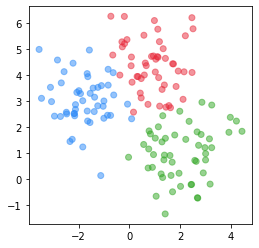

In [27]:
def visualize_clasters(X, labels, n_clusters=4):
    unique_labels = np.unique(labels)
    unique_colors = np.random.random((len(unique_labels), 3))
    colors = [unique_colors[l] for l in labels]
    plt.figure(figsize=(4, 4))
    plt.scatter(X[:, 0], X[:, 1], c=colors, alpha=0.5)
#     centroids = KMeans(n_clusters=n_clusters).fit(X)
#     plt.scatter(centroids[:, 0], centroids[:, 1], marker=r'$\clubsuit$')
    plt.show()
visualize_clasters(X, labels)
# visualize_clasters(X, true_labels)

Протестируйте алгоритм на синтетических данных.
При необходимости подберите гиперпараметры для достижения лучшего качества кластеризации.

# Sample init

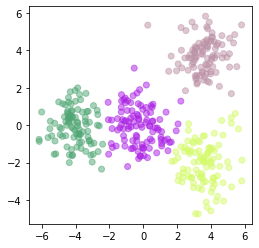

In [28]:
kmeans = KMeans(n_clusters=4, init = 'sample')
kmeans.fit(X_1)
labels = kmeans.predict(X_1)
visualize_clasters(X_1, labels)

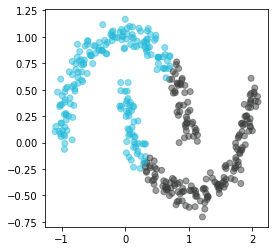

In [29]:
kmeans = KMeans(n_clusters=2, init = 'sample')
kmeans.fit(X_2)
labels = kmeans.predict(X_2)
visualize_clasters(X_2, labels, 2)

# Random init

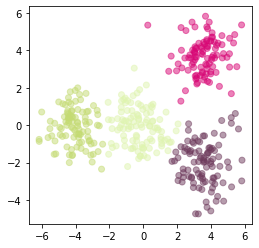

In [30]:
kmeans = KMeans(n_clusters=4, init = 'random')
kmeans.fit(X_1)
labels = kmeans.predict(X_1)
visualize_clasters(X_1, labels)

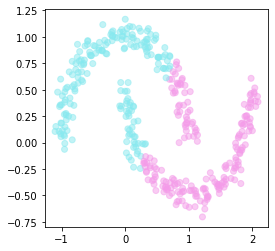

In [31]:
kmeans = KMeans(n_clusters=2, init = 'random')
kmeans.fit(X_2)
labels = kmeans.predict(X_2)
visualize_clasters(X_2, labels, 2)

# k-means++ init

In [ ]:
k_means = KMeans(n_clusters=3, init='k-means++')
k_means.fit(X_1)
labels = kmeans.predict(X_1)
print("-------------")
print(labels)
# k_means.centroids
# visualize_clasters(X_1, labels, 5)

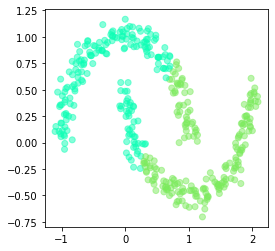

In [35]:
k_means = KMeans(n_clusters=4, init='k-means++')
k_means.fit(X_2)
labels = kmeans.predict(X_2)
visualize_clasters(X_2, labels, 2)